In [ ]:
!pip install textract
!apt-get install -y poppler-utils
!apt-get install -y antiword
!apt-get install -y unrtf
!apt-get install -y tesseract-ocr
!apt-get install -y ghostscript
!pip install pyPDF2
!pip install scikit-learn
!pip install --upgrade scikit-learn
!pip show scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.2 [186 kB]
Fetched 186 kB in 1s (149 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120511 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.2_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.2) ...
Setting up poppler-utils (22.02.0-2ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
os.listdir('/content/gdrive/MyDrive/Resume_Classifcation')

['workday resumes',
 'Peoplesoft resumes',
 'SQL Developer Lightning insight',
 'React JS Developer']

In [ ]:

file_path1 = []
category1 = []
directory1 = '/content/gdrive/MyDrive/Resume_Classifcation/Peoplesoft resumes'

for i in os.listdir(directory1):
    if i.endswith('.docx'):
        file_path = os.path.join(directory1, i)
        content = textract.process(file_path).decode('utf-8')
        file_path1.append(content)
        category1.append('PeopleSoft')
    elif i.endswith('.doc'):
        file_path = os.path.join(directory1, i)
        content = textract.process(file_path, extension='.doc').decode('utf-8')
        file_path1.append(content)
        category1.append('PeopleSoft')


In [ ]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,\n PeopleSoft Admin/Peo...,PeopleSoft
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft
3,\n PeopleSoft Database Ad...,PeopleSoft
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
5,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
6,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
7,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft
8,\n|Personal Details ...,PeopleSoft
9,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft


In [ ]:
!pip install pyPDF2
import os
from PyPDF2 import PdfReader

file_path2 = []
category2 = []
directory2 = '/content/gdrive/MyDrive/Resume_Classifcation/React JS Developer'

for i in os.listdir(directory2):
    if i.endswith('.docx'):
        file_path = os.path.join(directory2, i)
        content = textract.process(file_path).decode('utf-8')
        file_path2.append(content)
        category2.append('React JS Developer')
    elif i.endswith('.pdf'):
        file_path = os.path.join(directory2, i)
        with open(file_path, 'rb') as pdf_file:
            pdf_reader = PdfReader(pdf_file)
            content = ""
            for page in pdf_reader.pages:
                content += page.extract_text()
        file_path2.append(content)
        category2.append('React JS Developer')
    elif i.endswith('.doc'):
        file_path = os.path.join(directory2, i)
        content = textract.process(file_path).decode('utf-8')
        file_path2.append(content)
        category2.append('React JS Developer')

In [ ]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,\nPage | 1 \n Name: M. Prabakaran \nTitle...,React JS Developer
1,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
4,Name: Ravali P \n\n\n\n ...,React JS Developer
5,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer
6,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
7,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
8,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
9,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer


In [ ]:
file_path3 = []
category3 = []
directory3 = '/content/gdrive/MyDrive/Resume_Classifcation/SQL Developer Lightning insight'

for i in os.listdir(directory3):
    if i.endswith('.docx'):
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')
    elif i.endswith('.doc'):
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [ ]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
1,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
2,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
3,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer
4,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
5,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
6,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
7,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
8,BUDDHA VAMSI ...,SQL Developer
9,KAMBALLA PRADEEP ...,SQL Developer


In [ ]:
file_path4 = []
category4 = []
directory4 = '/content/gdrive/MyDrive/Resume_Classifcation/workday resumes'

for i in os.listdir(directory4):
    if i.endswith('.docx'):
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')
    elif i.endswith('.doc'):
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [ ]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,\n Hari Krishna ...,Workday
3,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
4,G Himaja\n\n ...,Workday
5,\nShireesh ...,Workday
6,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
7,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday
8,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
9,\n Workday Integration Consultant\n\nName...,Workday


In [ ]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,\n PeopleSoft Admin/Peo...,PeopleSoft,NaN,NaN,NaN
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft,NaN,NaN,NaN
3,\n PeopleSoft Database Ad...,PeopleSoft,NaN,NaN,NaN
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday
75,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday
76,\nName : Naresh Babu Cherukuri\n\n\nObjective...,NaN,NaN,NaN,Workday
77,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,NaN,NaN,NaN,Workday


In [ ]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [ ]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,\n PeopleSoft Admin/Peo...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,\n PeopleSoft Database Ad...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday,Workday
75,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday,Workday
76,\nName : Naresh Babu Cherukuri\n\n\nObjective...,NaN,NaN,NaN,Workday,Workday
77,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,NaN,NaN,NaN,Workday,Workday


In [ ]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [ ]:
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,\n PeopleSoft Admin/Peo...
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...
3,PeopleSoft,\n PeopleSoft Database Ad...
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
5,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
6,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
7,PeopleSoft,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n..."
8,PeopleSoft,\n|Personal Details ...
9,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...


In [ ]:
resume_data["Raw_Details"][4]

"C O N T A C T :\n\n\n\nAddress: Manyata Tech Park,\n\nNagavara, Bangalore 560045\n\n\n\nLinIn: subha-santosh-b16698139\n\n\n\nS K I L L S :\n\n\n\nPeopleSoft Finance FSCM ARIBA\n\nJAVA Full Stack Development SQL\n\nPower BI\n\n\n\nI N T E R E S T S :\n\n\n\nLearning new Technologies. Planting Hybrid Species.\n\nCooking. Travelling Singing.\n\n\n\nS T R E N G T H S :\n\n\n\nTime Management. Responsible for my deliverables.\n\nLeadership qualities.\n\n\n\nL A N G U A G E S :\n\n\n\nJapanese.\n\nFrench (Started Learning).\n\n\nSRI SUBHA SANTOSH KUMAR JOSYULA\n\nA S S O C I A T E C O N S U L T A N T\n\nP R O F E S S I O N A L S U M M A R Y :\n\n\n\nI am having more than 3.2 years of experience in assistance and development for projects like ARIBA and PEOPLESOFT FINANCE . I have successfully completed TOOLS PATCH and TOOLS UPGRADE PROJECT with 0% refuse validations. I am the main Point of contact in Non Regression Testing and User Acceptance Testing. I am responsible to find solutions whic

In [ ]:
resume_data.to_csv('Raw_Resume.csv', index=False)

In [ ]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,\n PeopleSoft Admin/Peo...
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...
3,PeopleSoft,\n PeopleSoft Database Ad...
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
...,...,...
74,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
75,Workday,Vinay kumar .v\nWorkday Functional Consultant\...
76,Workday,\nName : Naresh Babu Cherukuri\n\n\nObjective...
77,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...


In [ ]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
58,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
59,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
60,Workday,\n Hari Krishna ...
61,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
62,Workday,G Himaja\n\n ...
63,Workday,\nShireesh ...
64,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
65,Workday,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...
66,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
67,Workday,\n Workday Integration Consultant\n\nName...


In [ ]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

In [ ]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,\n PeopleSoft Admin/Peo...,2875
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,2189
3,\n PeopleSoft Database Ad...,1727
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356


In [ ]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,\n PeopleSoft Admin/Peo...,12431
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,8847
3,\n PeopleSoft Database Ad...,7070
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,2150


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,\n PeopleSoft Admin/Peo...,303
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,186
3,\n PeopleSoft Database Ad...,177
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,42


In [ ]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,\n PeopleSoft Admin/Peo...,16
2,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,6
3,\n PeopleSoft Database Ad...,4
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,8


In [ ]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,\n PeopleSoft Admin/Peo...,2875,12431,303,16
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,2189,8847,186,6
3,PeopleSoft,\n PeopleSoft Database Ad...,1727,7070,177,4
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
...,...,...,...,...,...,...
74,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076,8329,236,6
75,Workday,Vinay kumar .v\nWorkday Functional Consultant\...,702,5126,150,2
76,Workday,\nName : Naresh Babu Cherukuri\n\n\nObjective...,2083,8113,213,4
77,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,955,6542,216,6


In [ ]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [ ]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [ ]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,\n PeopleSoft Admin/Peo...,peoplesoft admin peoplesoft dba ganesh alladi ...
2,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,profile summary years experience implementing ...
3,PeopleSoft,\n PeopleSoft Database Ad...,peoplesoft database administrator gangareddy p...
4,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
...,...,...,...
74,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm name kumar role workday consul...
75,Workday,Vinay kumar .v\nWorkday Functional Consultant\...,vinay kumar workday functional consultant expe...
76,Workday,\nName : Naresh Babu Cherukuri\n\n\nObjective...,name naresh babu cherukuri objective take resp...
77,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,chinna subbarayudu dob march nationality india...


In [ ]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,peoplesoft database administrator gangareddy p...
4,PeopleSoft,address manyata tech park nagavara bangalore l...
...,...,...
74,Workday,workday hcm fcm name kumar role workday consul...
75,Workday,vinay kumar workday functional consultant expe...
76,Workday,name naresh babu cherukuri objective take resp...
77,Workday,chinna subbarayudu dob march nationality india...


In [ ]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [ ]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,peoplesoft database administrator gangareddy p...
4,PeopleSoft,address manyata tech park nagavara bangalore l...
...,...,...
74,Workday,workday hcm fcm name kumar role workday consul...
75,Workday,vinay kumar workday functional consultant expe...
76,Workday,name naresh babu cherukuri objective take resp...
77,Workday,chinna subbarayudu dob march nationality india...


In [ ]:
resume_data.Resume_Details[5]

'peoplesoft admin varkala vikas career objective total years experience peoplesoft admin peoplesoft dba hope enhance skill set adding value business enable implementation solutions aid company objectives understanding anticipating needs interests motivations clients deliver time budget quality delivering value improving agility quality reliability professional summary years experience peoplesoft implementation support people tools upgrades configuration migrations maintenance administration application server domains process scheduler servers web server domains pum elastic search involved various tools application upgrades experience driving infrastructure hardware upgrades disaster recovery activities configured secure web server ssl administration monitor system developing maintaining monitoring shell scripts experience oracle database administration experience health check peoplesoft environments experience peoplesoft database refreshes production development testing environments ex

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


In [ ]:
!python -m spacy download en_core_web_lg

import spacy
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

2023-08-08 10:54:26.361094: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
for token in doc_block[:30]:
    print(token,token.pos_)

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


In [ ]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,542
1,application,417
2,using,384
3,workday,353
4,reports,326
5,data,307
6,project,289
7,business,260
8,server,243
9,web,237


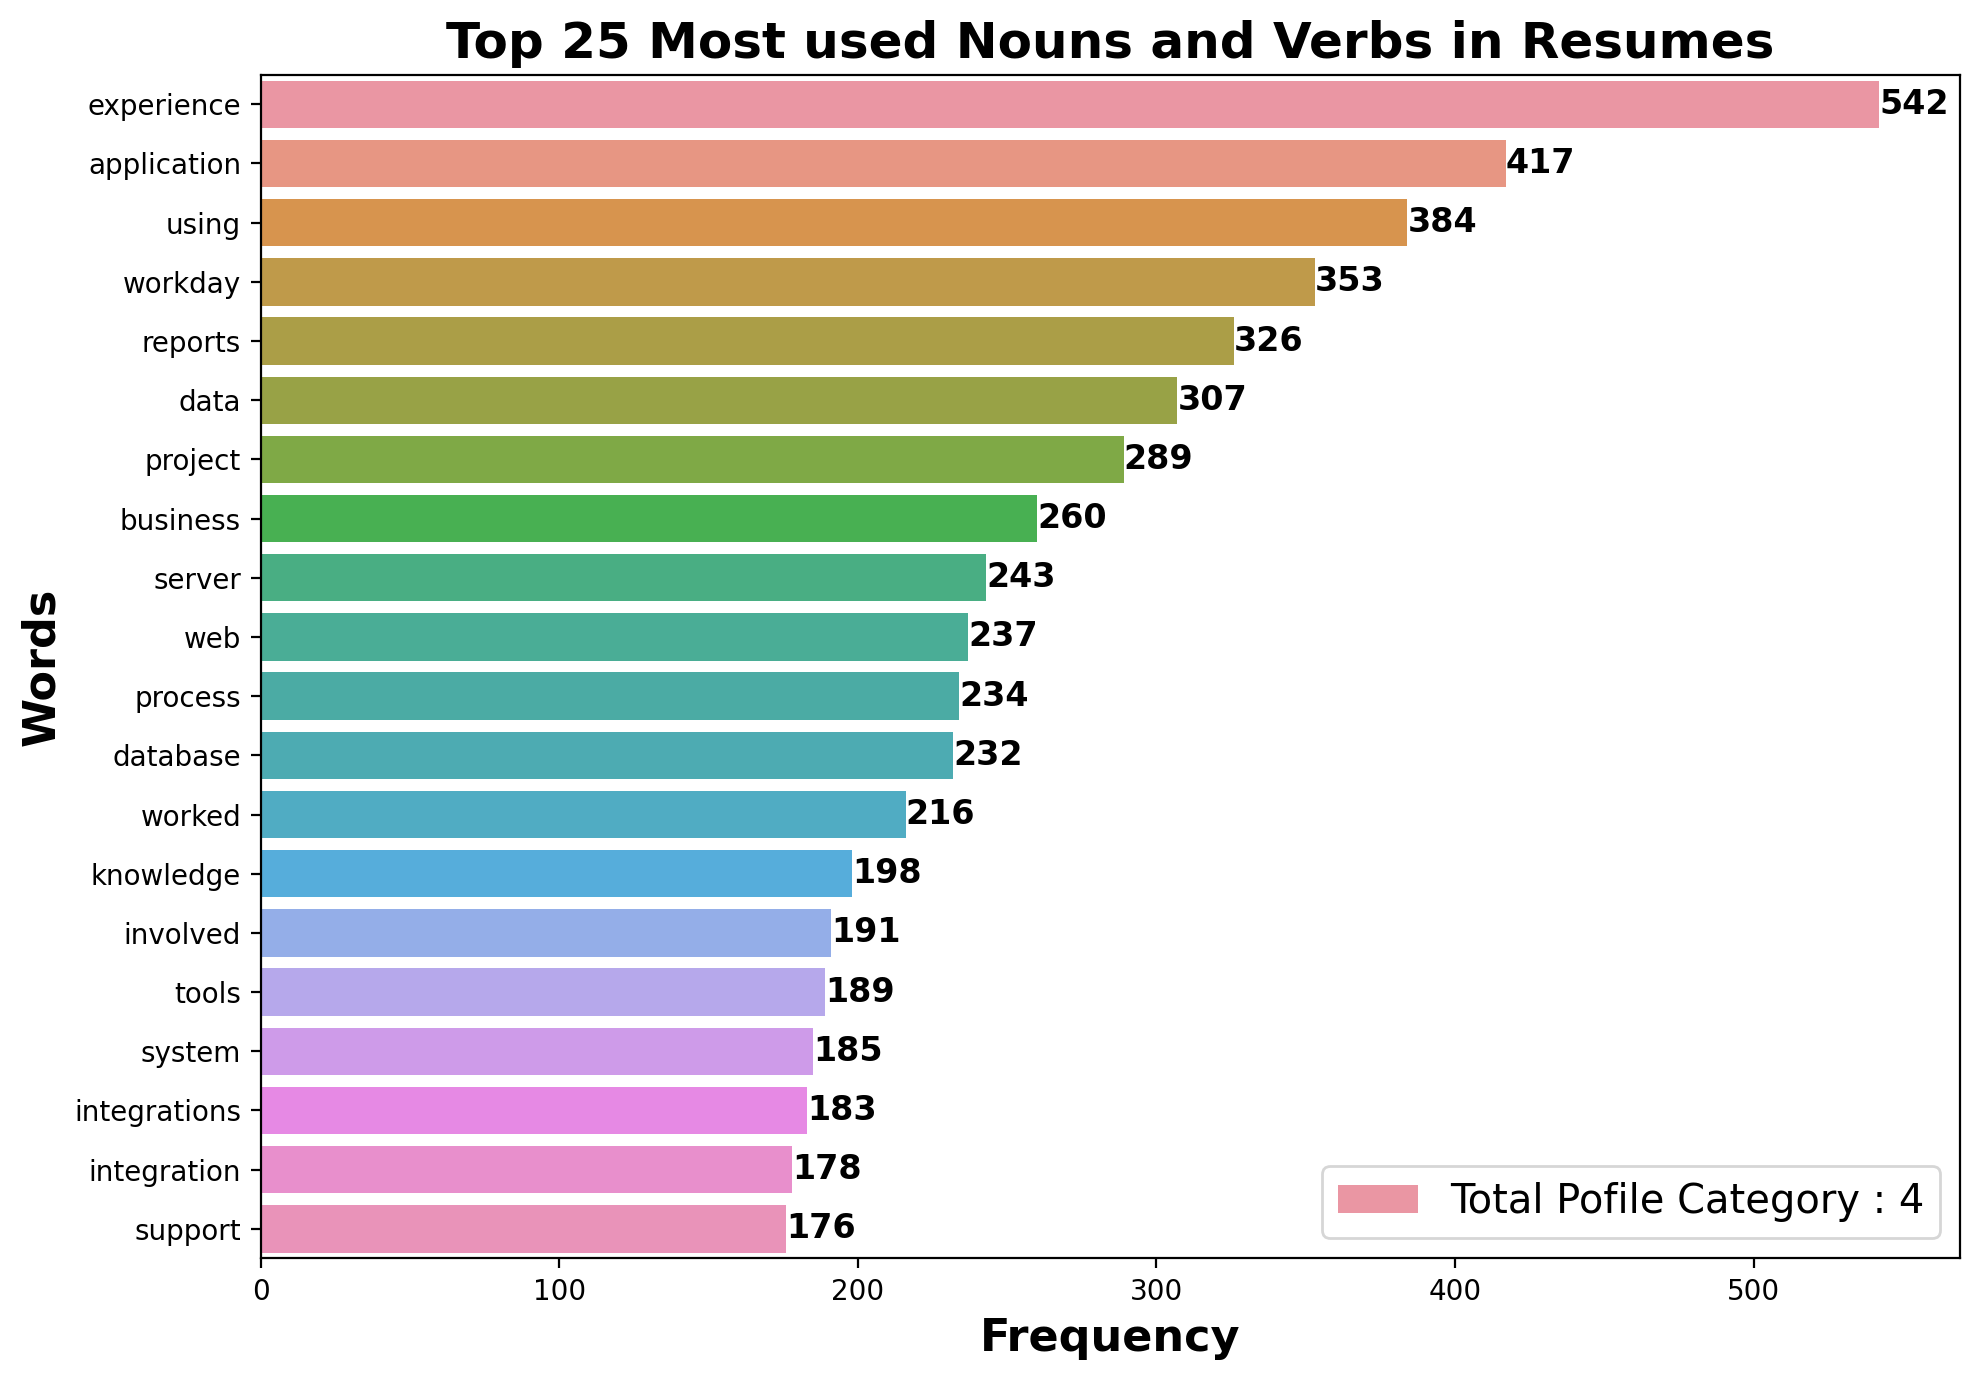

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [ ]:

import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

file_path = '/content/gdrive/MyDrive/Resume_Classifcation'
doc_file = []
pdf_file = []
docx_file = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)  # Correctly join the file_path and folder name
    for file in os.listdir(folder_path):  # Use folder_path, not the directory itself
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [ ]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [ ]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [ ]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

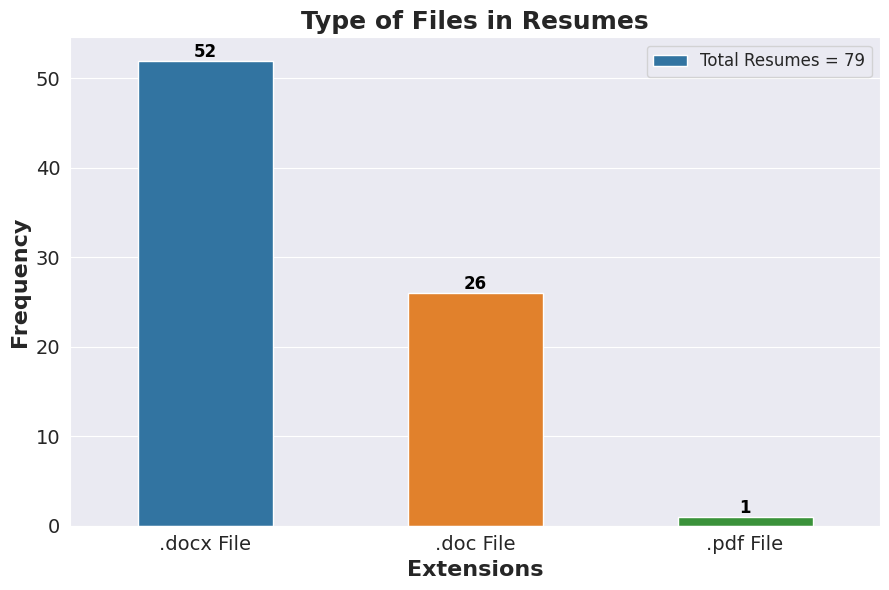

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

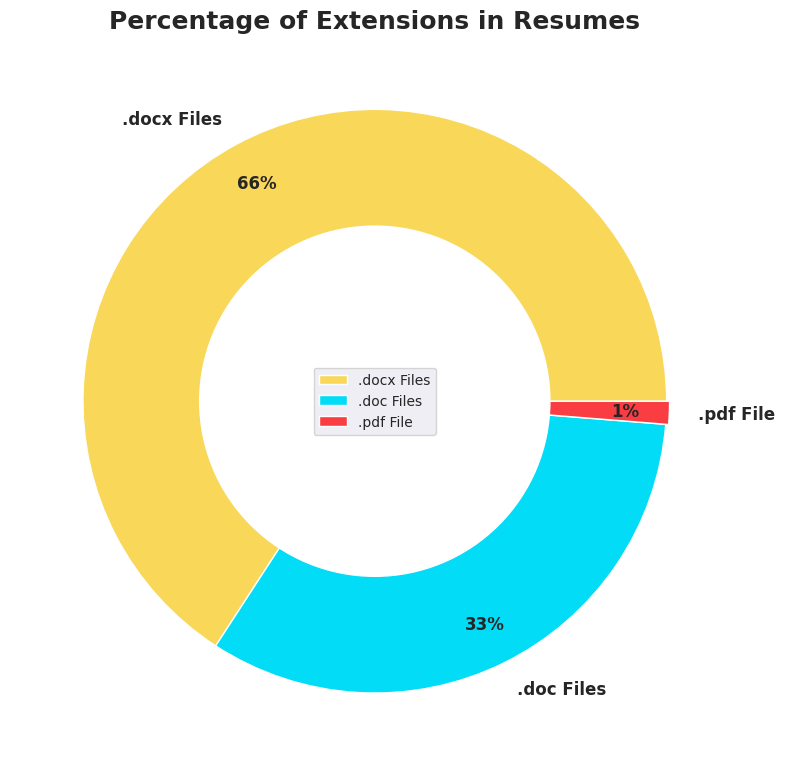

In [ ]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [ ]:
import os

file_path = r'/content/gdrive/MyDrive/Resume_Classifcation'
file_name = []
profile = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)  # Correctly join the file_path and folder name
    for file in os.listdir(folder_path):  # Use folder_path, not the directory itself
        # Append the folder name and file name regardless of the file type
        profile.append(folder)
        file_name.append(file)

In [ ]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,workday resumes,RameshP_Hexaware.docx
1,workday resumes,Gopi Krishna_Hexaware.docx
2,workday resumes,Hari Krishna M_Hexaware.doc
3,workday resumes,MooraboyinaGuravaiah_Hexaware.docx
4,workday resumes,Himaja G_(Hexaware).docx
...,...,...
74,React JS Developer,React JS Developer_Venkatalakshmi (1)-converte...
75,React JS Developer,Reactjs Developer_Ranga Gaganam_Musquare Techn...
76,React JS Developer,React JS Developer_KotaniDurgaprasad[3_1] (1)-...
77,React JS Developer,React Dev_Krishna Kanth.docx


In [ ]:
resume_data.Profile.value_counts().index

Index(['React JS Developer', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object')

In [ ]:
resume_data.Profile.value_counts()

React JS Developer                 24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: Profile, dtype: int64

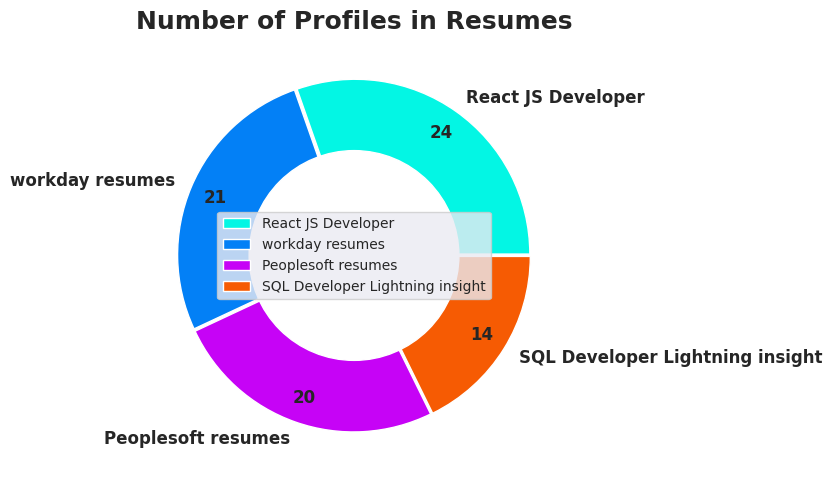

In [ ]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

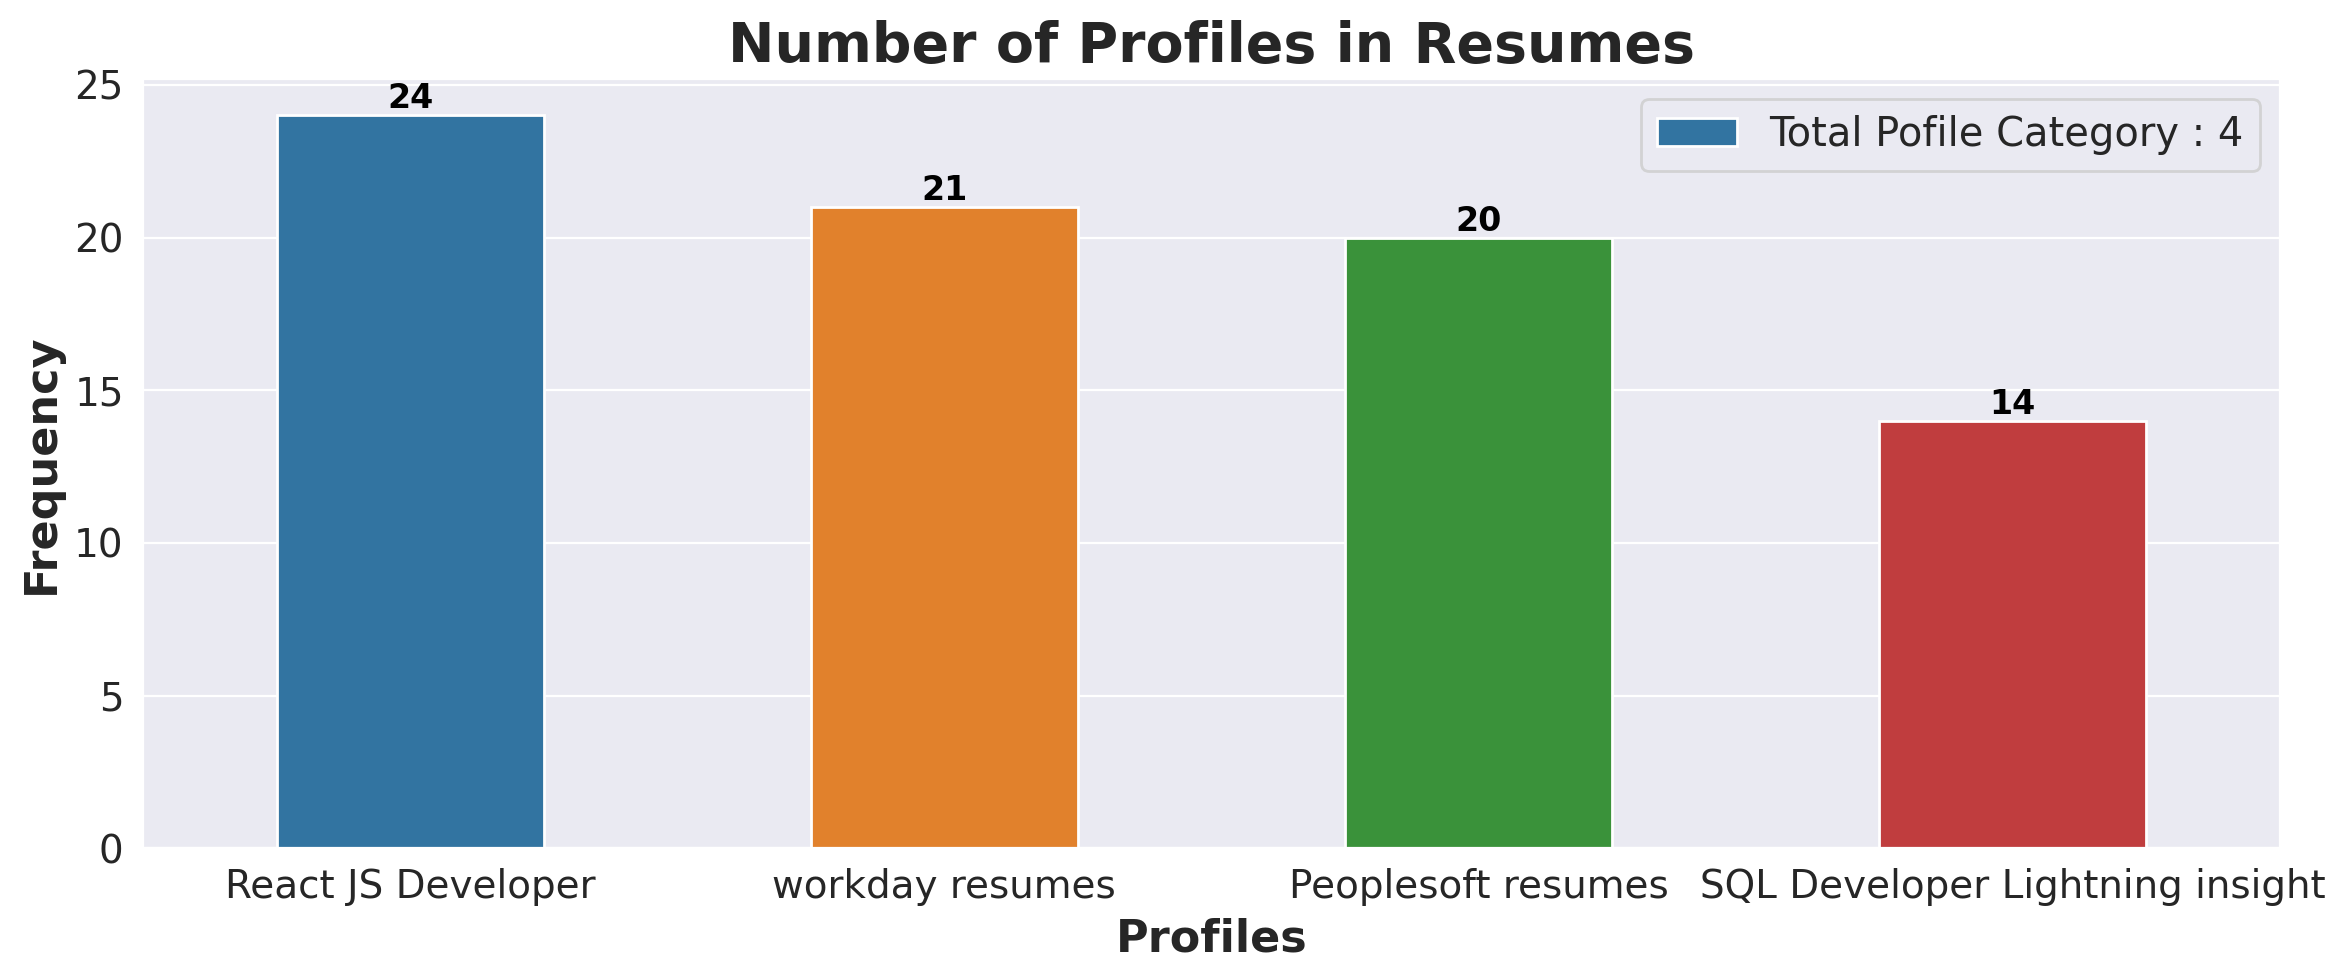

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(12,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8),dpi=100)

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode,
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

AttributeError: ignored

<Figure size 800x800 with 0 Axes>

In [ ]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

print(extract_text_from_docx('/content/gdrive/MyDrive/Resume_Classifcation/React JS Developer/React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

In [ ]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,peoplesoft database administrator gangareddy p...
4,PeopleSoft,address manyata tech park nagavara bangalore l...
...,...,...
74,Workday,workday hcm fcm name kumar role workday consul...
75,Workday,vinay kumar workday functional consultant expe...
76,Workday,name naresh babu cherukuri objective take resp...
77,Workday,chinna subbarayudu dob march nationality india...


In [ ]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['peoplesoft']),
 WordList(['admin']),
 WordList(['peoplesoft']),
 WordList(['dba']),
 WordList(['ganesh']),
 WordList(['alladi']),
 WordList(['career']),
 WordList(['objective']),
 WordList(['total']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['valid']),
 WordList(['expertise']),
 WordList(['years']),
 WordList(['peoplesoft']),
 WordList(['admin']),
 WordList(['peoplesoft']),
 WordList(['dba']),
 WordList(['hope']),
 WordList(['enhance'])]

In [ ]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['peoplesoft', 'admin']),
 WordList(['admin', 'peoplesoft']),
 WordList(['peoplesoft', 'dba']),
 WordList(['dba', 'ganesh']),
 WordList(['ganesh', 'alladi']),
 WordList(['alladi', 'career']),
 WordList(['career', 'objective']),
 WordList(['objective', 'total']),
 WordList(['total', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'valid']),
 WordList(['valid', 'expertise']),
 WordList(['expertise', 'years']),
 WordList(['years', 'peoplesoft']),
 WordList(['peoplesoft', 'admin']),
 WordList(['admin', 'peoplesoft']),
 WordList(['peoplesoft', 'dba']),
 WordList(['dba', 'hope']),
 WordList(['hope', 'enhance']),
 WordList(['enhance', 'skill'])]

In [ ]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['peoplesoft', 'admin', 'peoplesoft']),
 WordList(['admin', 'peoplesoft', 'dba']),
 WordList(['peoplesoft', 'dba', 'ganesh']),
 WordList(['dba', 'ganesh', 'alladi']),
 WordList(['ganesh', 'alladi', 'career']),
 WordList(['alladi', 'career', 'objective']),
 WordList(['career', 'objective', 'total']),
 WordList(['objective', 'total', 'years']),
 WordList(['total', 'years', 'experience']),
 WordList(['years', 'experience', 'valid']),
 WordList(['experience', 'valid', 'expertise']),
 WordList(['valid', 'expertise', 'years']),
 WordList(['expertise', 'years', 'peoplesoft']),
 WordList(['years', 'peoplesoft', 'admin']),
 WordList(['peoplesoft', 'admin', 'peoplesoft']),
 WordList(['admin', 'peoplesoft', 'dba']),
 WordList(['peoplesoft', 'dba', 'hope']),
 WordList(['dba', 'hope', 'enhance']),
 WordList(['hope', 'enhance', 'skill']),
 WordList(['enhance', 'skill', 'set'])]

In [ ]:
resume_data['Resume_Details']

0     anubhav kumar singh core competencies scriptin...
1     peoplesoft admin peoplesoft dba ganesh alladi ...
2     profile summary years experience implementing ...
3     peoplesoft database administrator gangareddy p...
4     address manyata tech park nagavara bangalore l...
                            ...                        
74    workday hcm fcm name kumar role workday consul...
75    vinay kumar workday functional consultant expe...
76    name naresh babu cherukuri objective take resp...
77    chinna subbarayudu dob march nationality india...
78    workday hcm techno functional consultant rahul...
Name: Resume_Details, Length: 79, dtype: object

In [ ]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

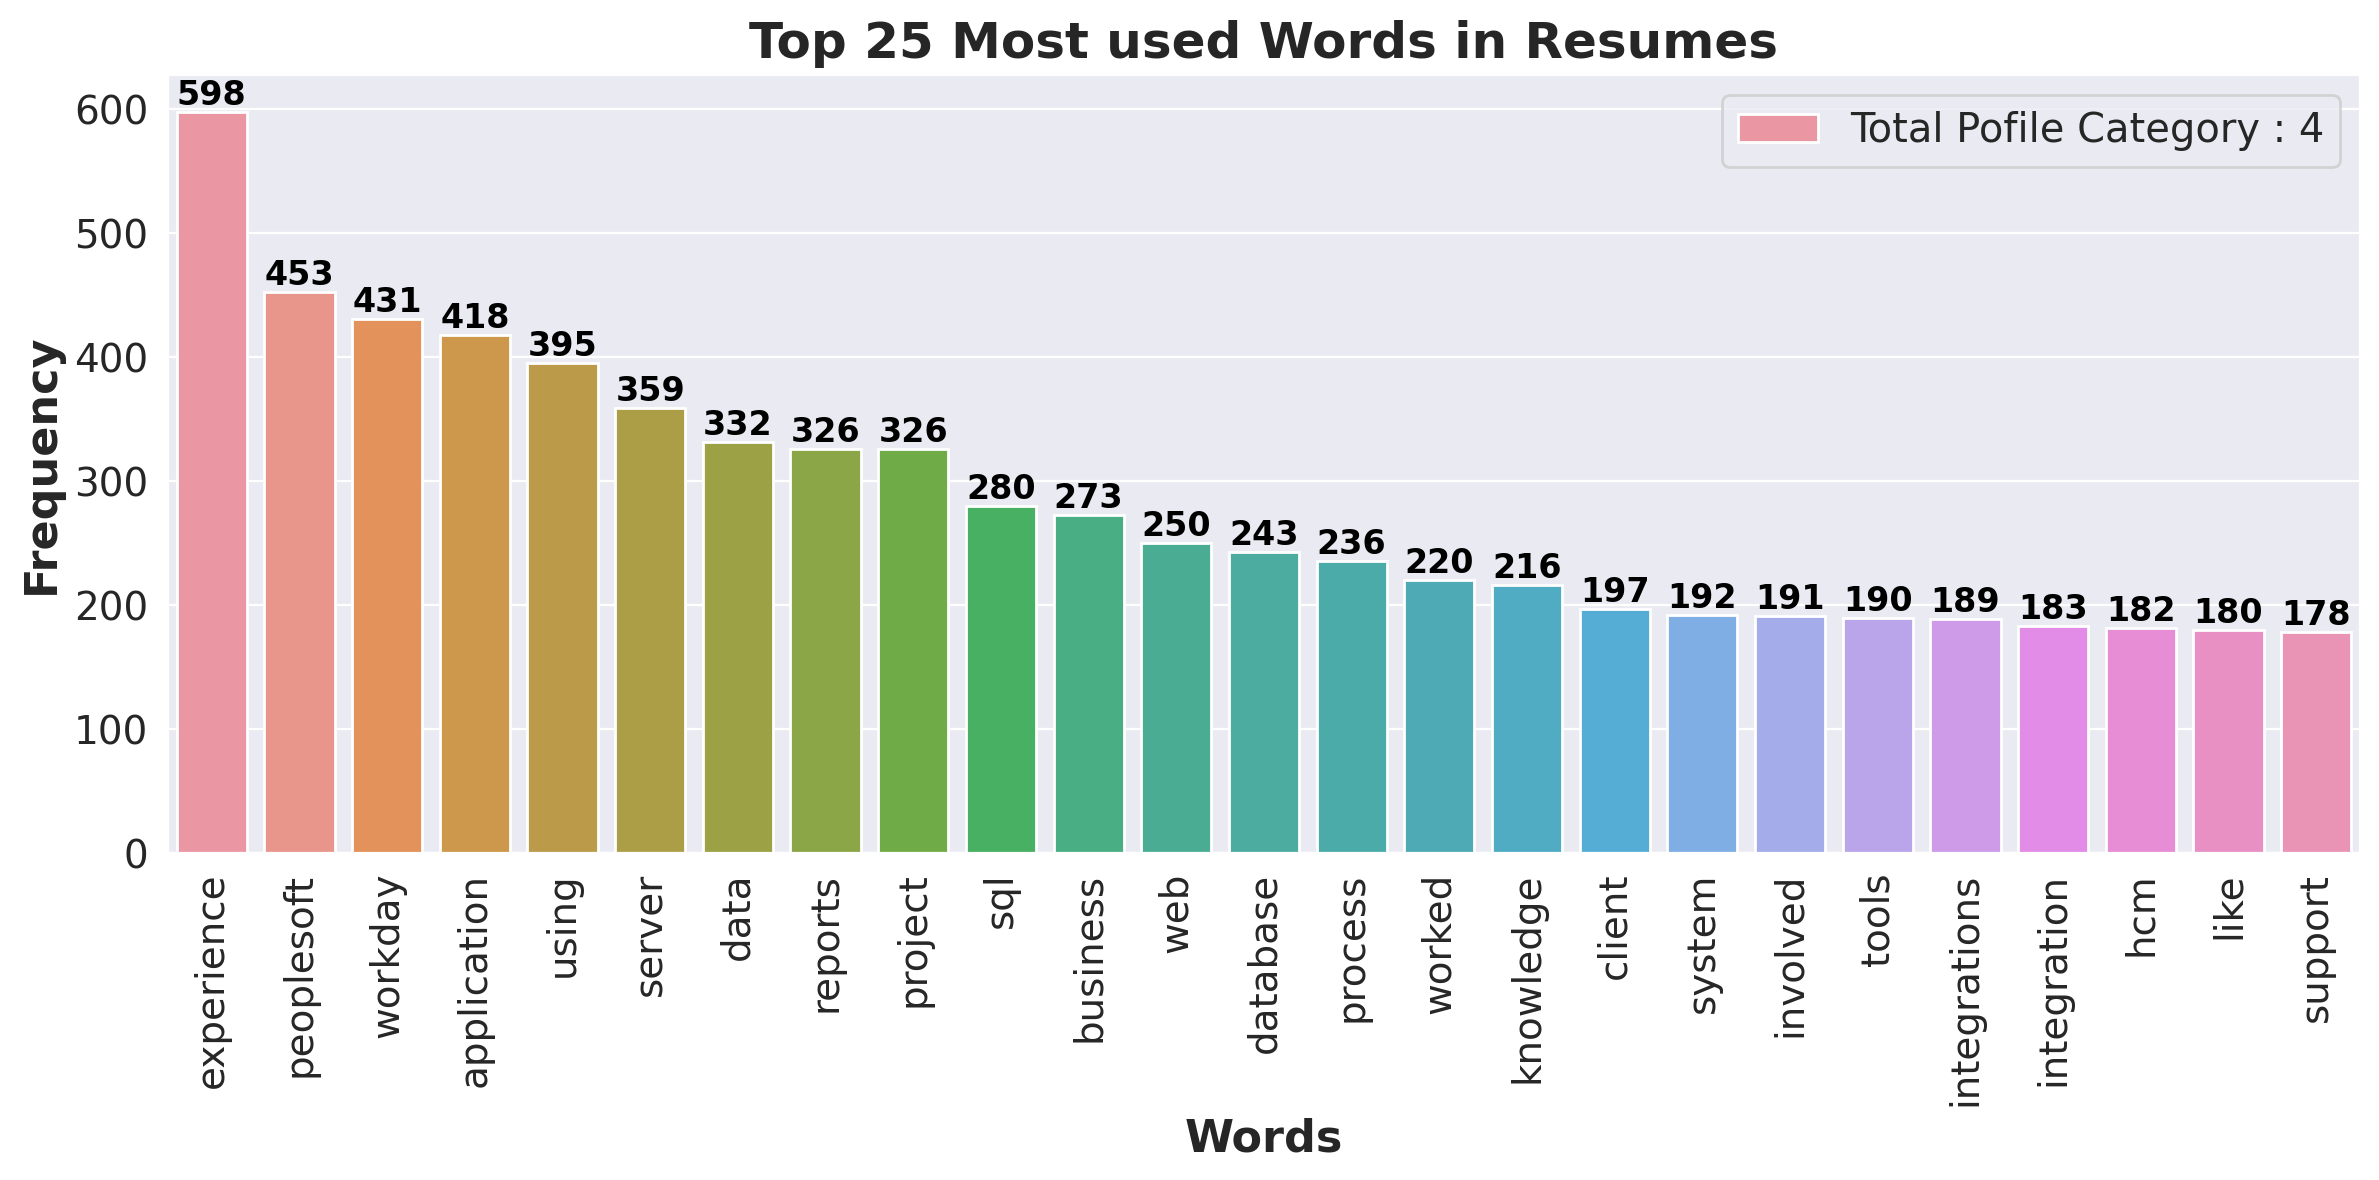

In [ ]:

fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

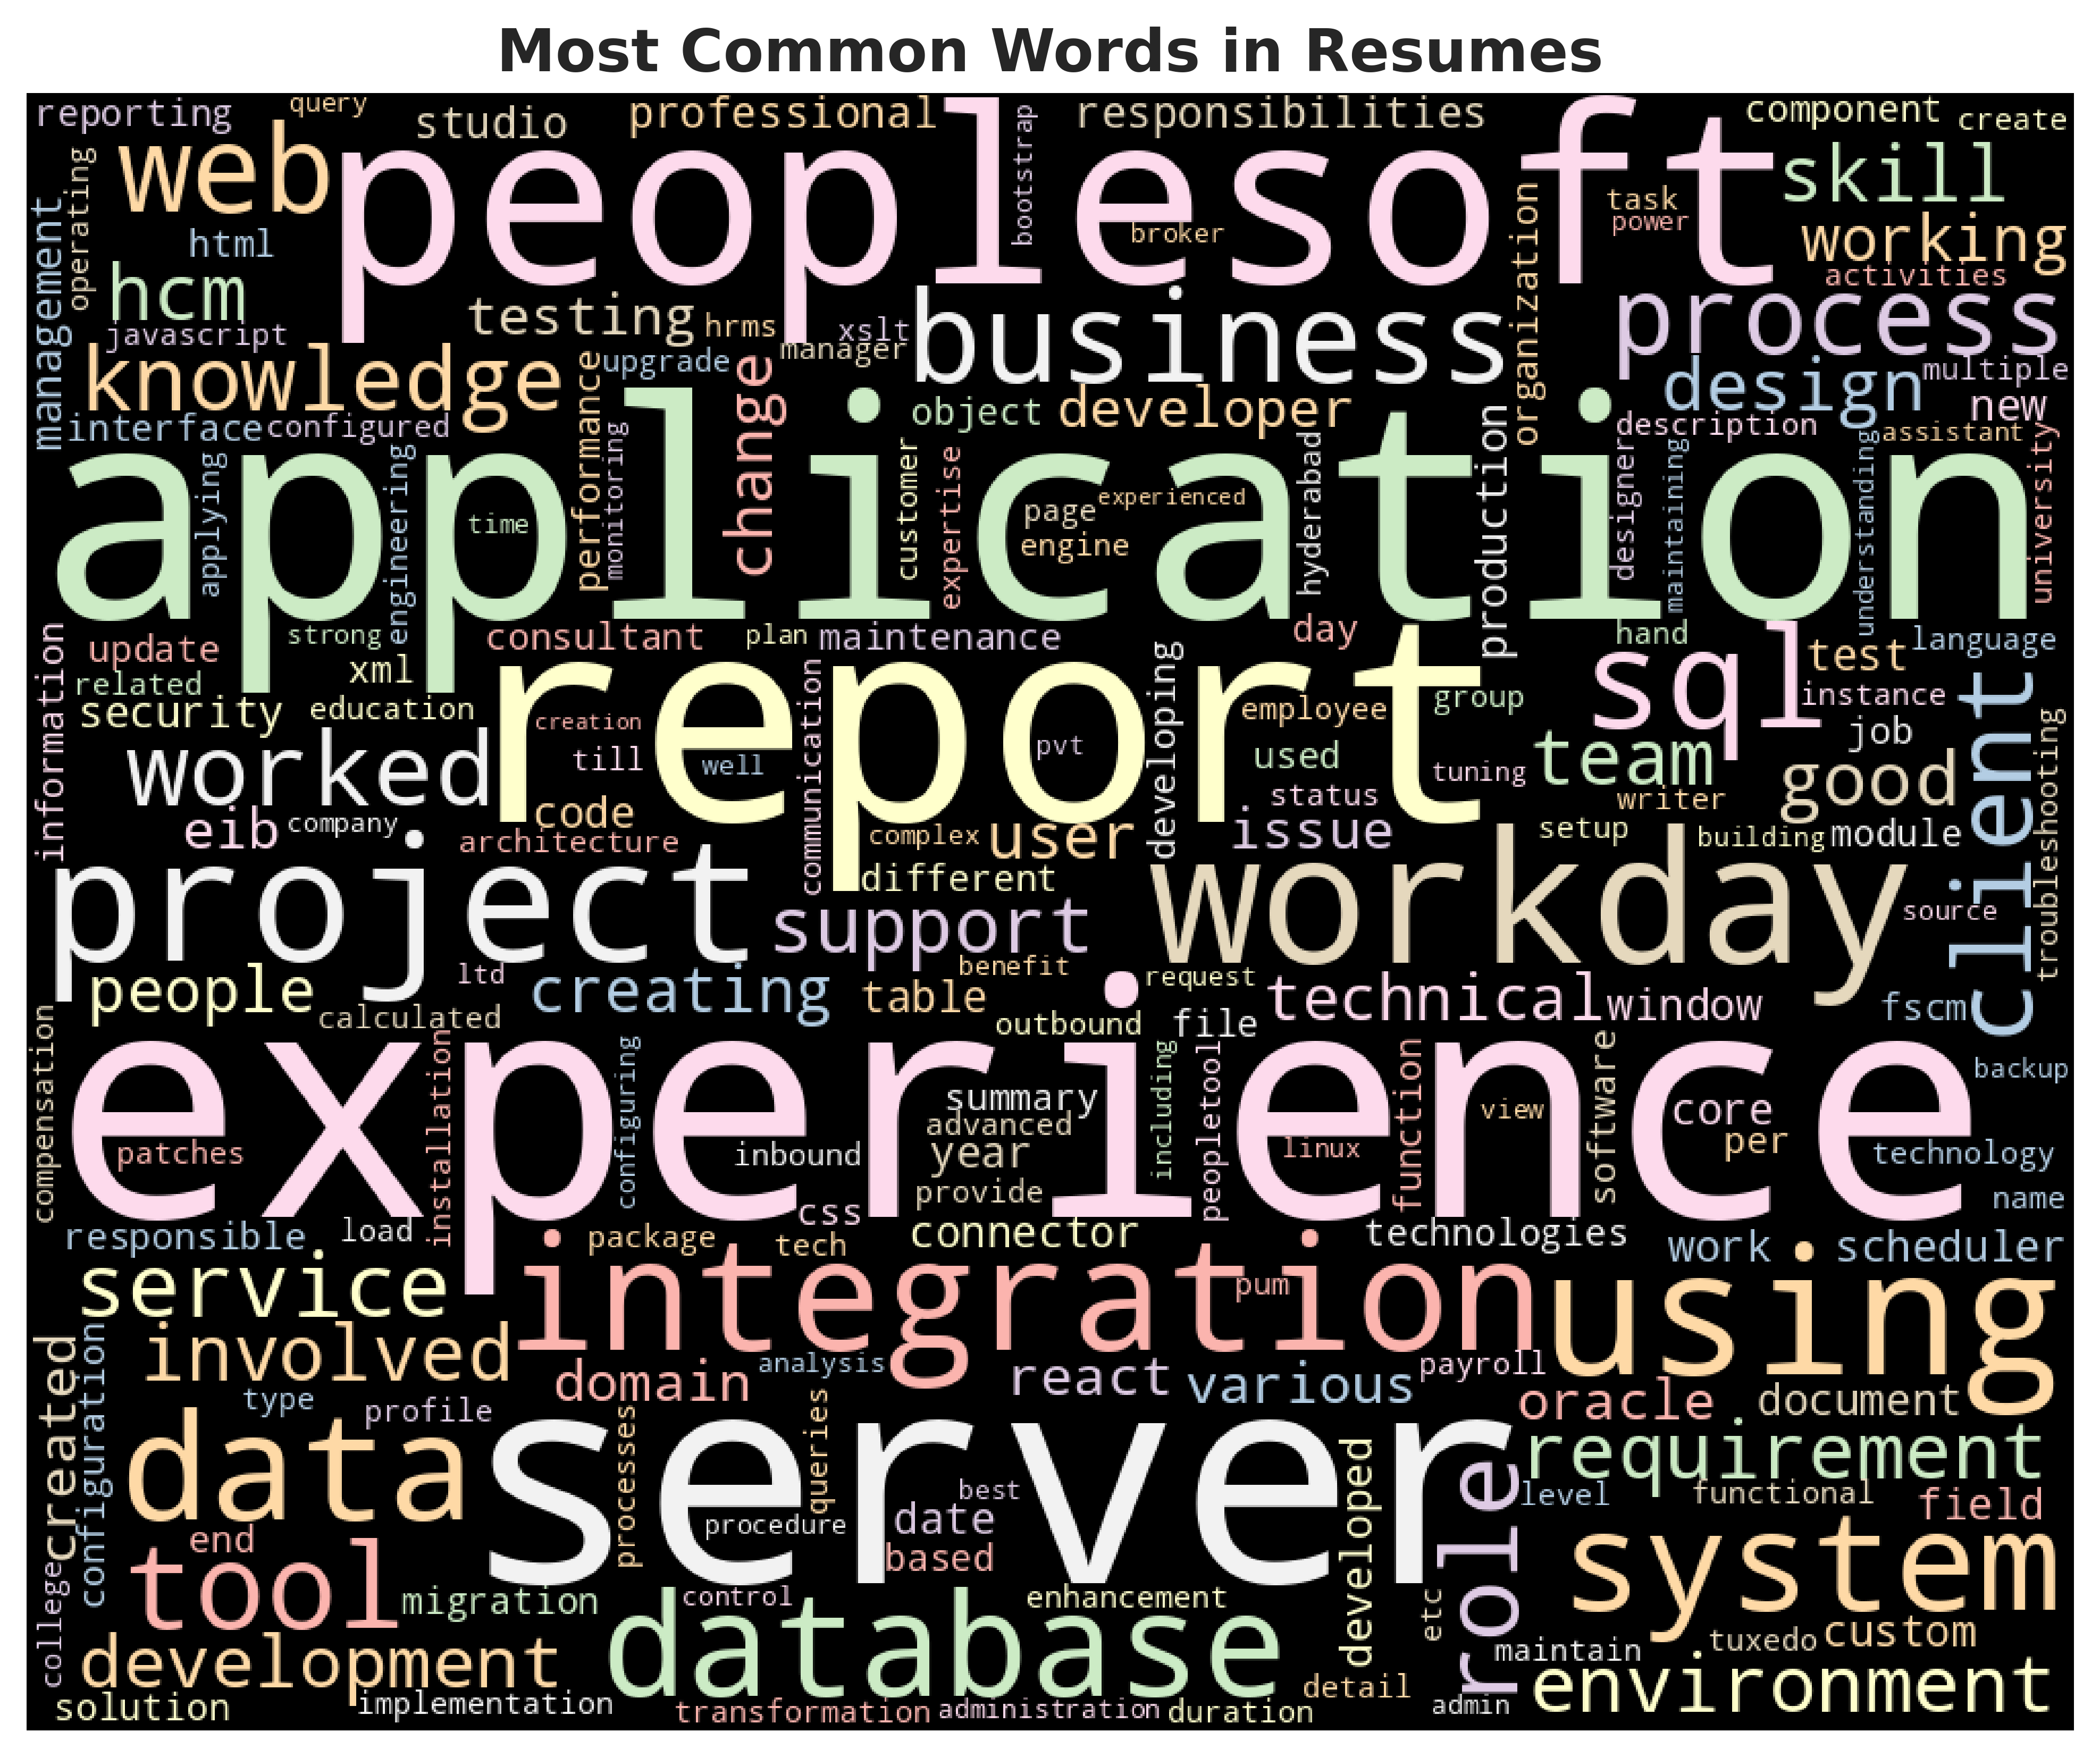

In [ ]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pdf2docx


from pdf2docx import Converter
import os

# # # dir_path for input reading and output files & a for loop # # #

path_input = r'/content/gdrive/MyDrive/Resume_Classifcation/React JS Developer'
path_output = r'/content/gdrive/MyDrive/Resume_Classifcation'
for file in os.listdir(path_input):
    if file.endswith('.pdf'):
        final = os.path.join(path_input, file)
        cv = Converter(final)
        basename = os.path.splitext(file)[0]
        print(basename)
        cv.convert(path_output + '/' + basename+'.docx', start=0, end=None)
        cv.close()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 50.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=a54ed85647f562351055102ed3d68ab11d988718ef0e4294446e4eab51eca847
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184489 sha256=b2f46bc4dff1e8666336d131d8fe0a3d45761fcabfc459cf61927fb9ca9a823e
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built fire python-docx
Reactjs Developer_Prabakaran_Musqu

In [ ]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,peoplesoft database administrator gangareddy p...
4,PeopleSoft,address manyata tech park nagavara bangalore l...


In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,0
1,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,0
2,PeopleSoft,profile summary years experience implementing ...,0
3,PeopleSoft,peoplesoft database administrator gangareddy p...,0
4,PeopleSoft,address manyata tech park nagavara bangalore l...,0
...,...,...,...
74,Workday,workday hcm fcm name kumar role workday consul...,3
75,Workday,vinay kumar workday functional consultant expe...,3
76,Workday,name naresh babu cherukuri objective take resp...,3
77,Workday,chinna subbarayudu dob march nationality india...,3


In [ ]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [ ]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

In [ ]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

In [ ]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [ ]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

((59, 3696), (20, 3696))

In [ ]:
print(y_train),print(y_test)

['PeopleSoft' 'React JS Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'SQL Developer' 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'PeopleSoft' 'React JS Developer' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'Workday' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'Workday' 'Workday' 'Workday' 'React JS Developer'
 'Workday' 'React JS Developer' 'SQL Developer' 'Workday'
 'React JS Developer' 'Workday' 'SQL Developer' 'Workday' 'PeopleSoft'
 'PeopleSoft' 'SQL Developer' 'PeopleSoft' 'Workday' 'SQL Developer'
 'PeopleSoft' 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'Workday'
 'Workday' 'PeopleSoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday']
['PeopleSoft' 'PeopleSoft' 'React JS Developer' 'Workday' 'Workday'
 'React JS Developer' 'R

(None, None)

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.64
Accuracy of  test set    : 0.75
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       0.80      0.80      0.80         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.56      1.00      0.71         5

          accuracy                           0.75        20
         macro avg       0.59      0.70      0.63        20
      weighted avg       0.64      0.75      0.68        20




In [ ]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.75      1.00      0.86         6
     SQL Developer       1.00      0.50      0.67         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.90        20
         macro avg       0.94      0.88      0.88        20
      weighted avg       0.93      0.90      0.89        20




In [ ]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [ ]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       0.75      1.00      0.86         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.90        20
         macro avg       0.94      0.89      0.90        20
      weighted avg       0.93      0.90      0.90        20




In [ ]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.94      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [ ]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.95
Accuracy of  test set    : 0.95
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       0.83      1.00      0.91         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [ ]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.75
Accuracy of  test set    : 0.65
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       0.00      0.00      0.00         5
React JS Developer       0.46      1.00      0.63         6
     SQL Developer       1.00      0.50      0.67         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.65        20
         macro avg       0.62      0.62      0.57        20
      weighted avg       0.59      0.65      0.57        20




In [ ]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.94      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [ ]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [ ]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.644068,0.75,0.59,0.70,0.63
1,DecisionTree Classifier,1.000000,0.90,0.94,0.88,0.88
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,0.90,0.94,0.89,0.90
4,Logistic Regression,1.000000,0.95,0.96,0.94,0.95
5,Bagging Classifier,0.949153,0.95,0.96,0.95,0.95
6,AdaBoost Classifier,0.745763,0.65,0.62,0.62,0.57
7,Gradient Boosting Classifier,1.000000,0.95,0.96,0.94,0.95
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [ ]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

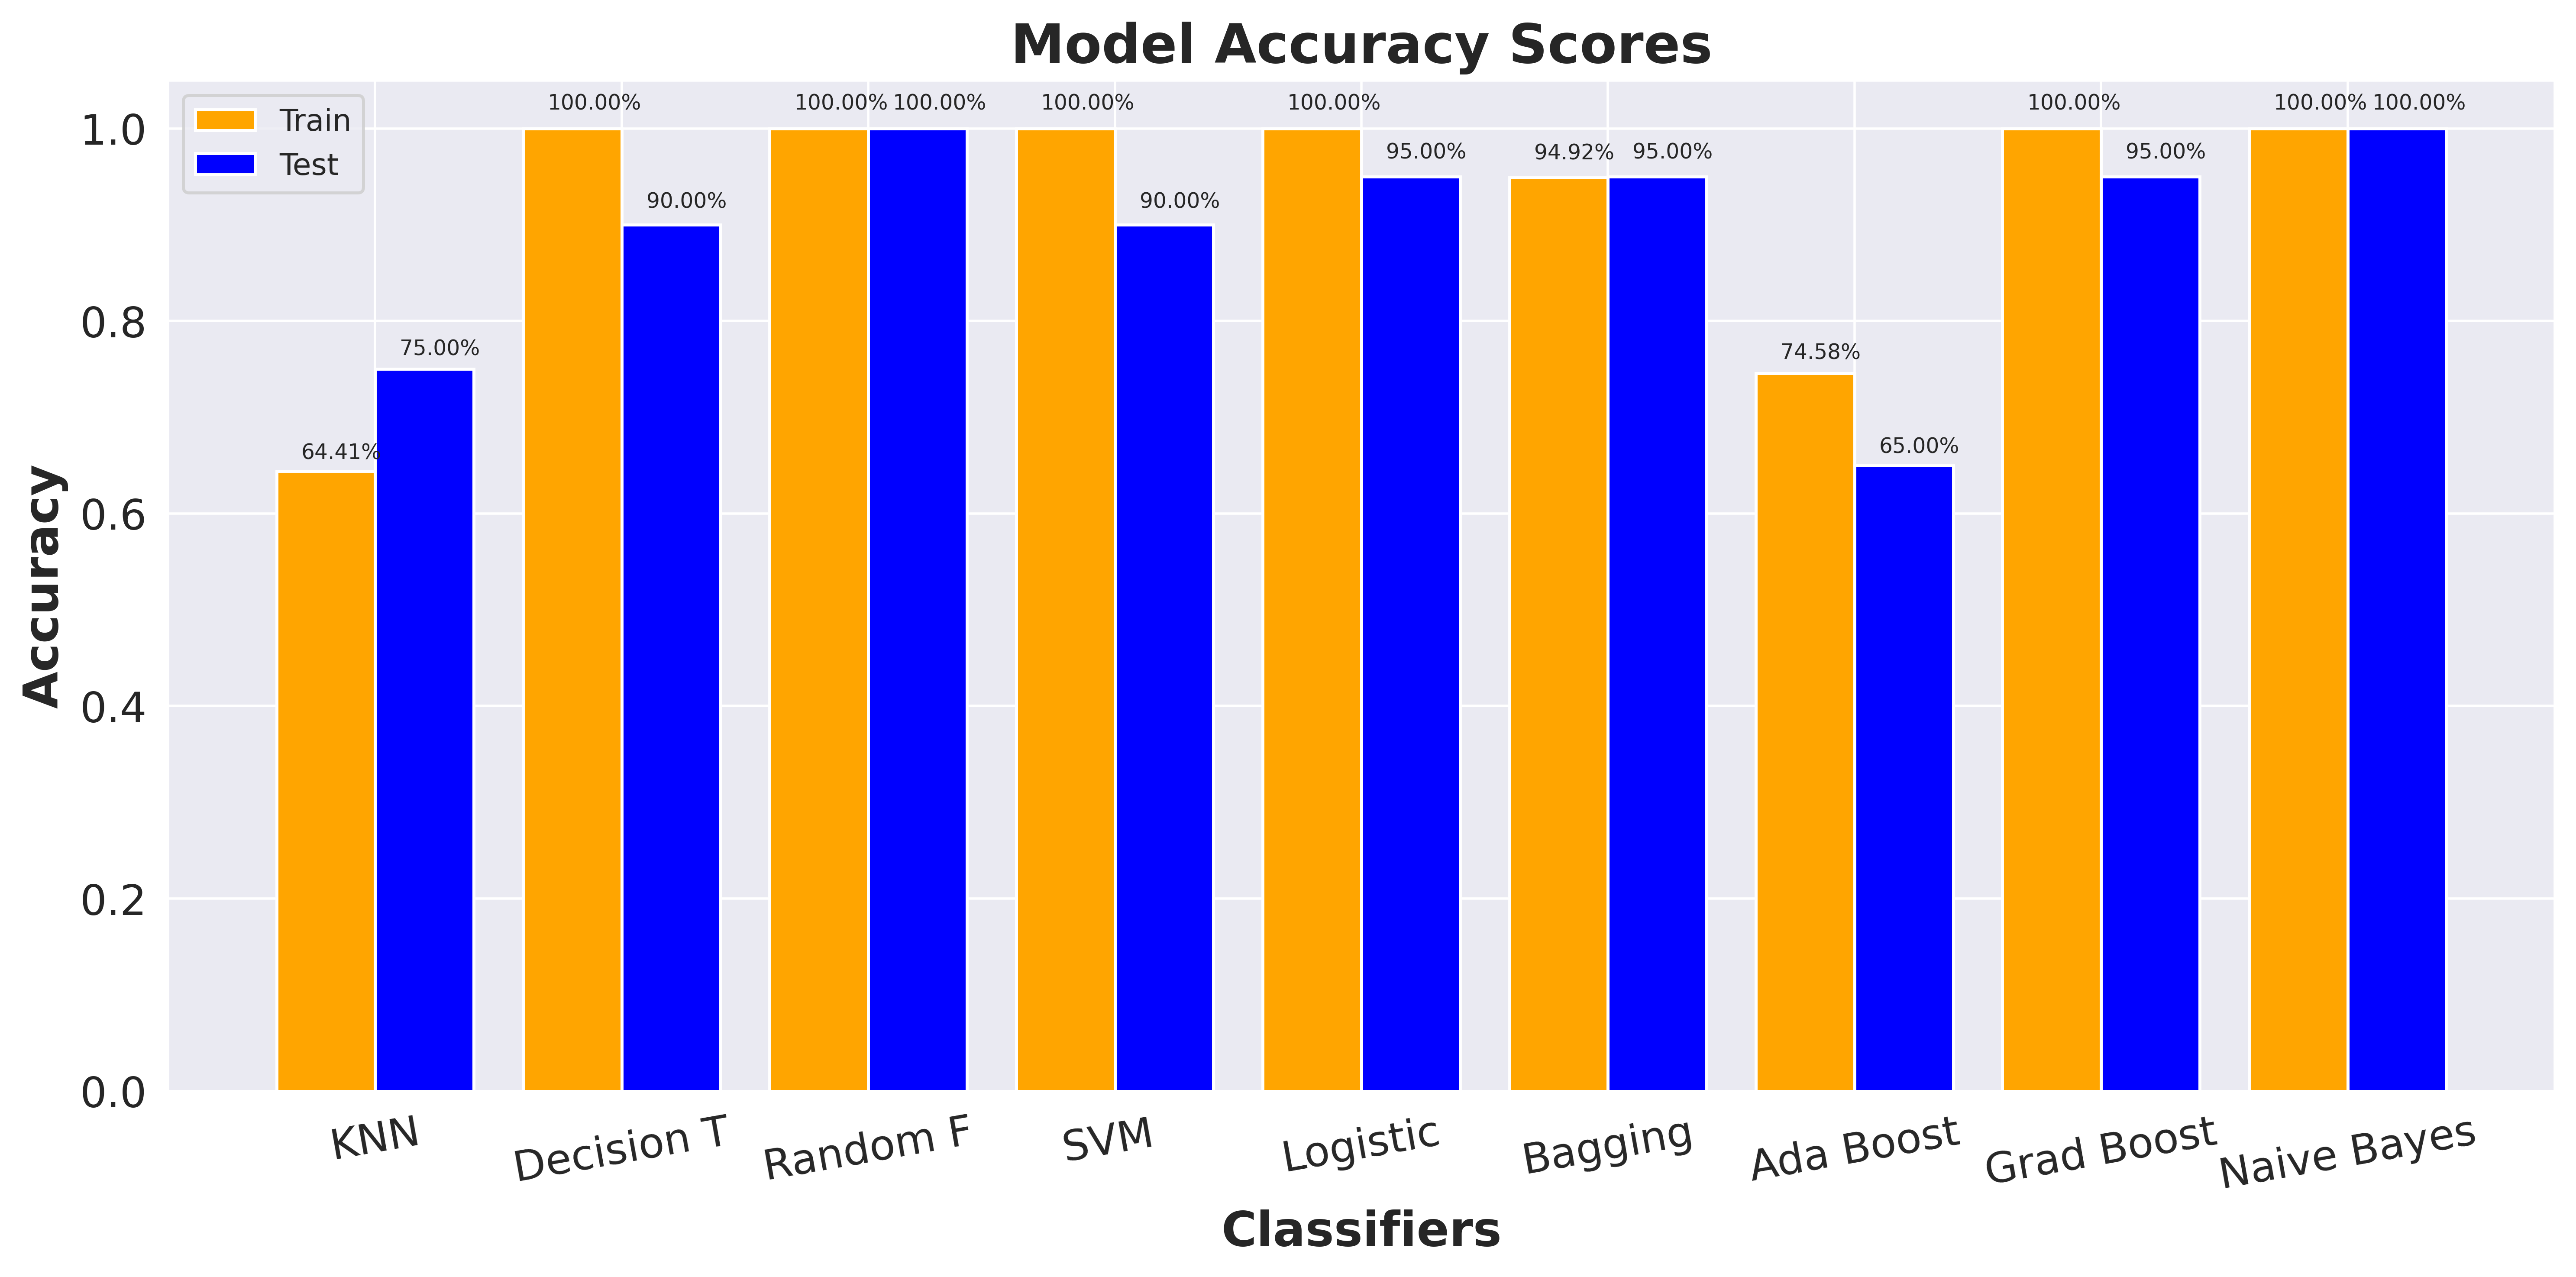

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

In [ ]:
import joblib

# Save the model
joblib.dump(model_DT, 'model_DT.joblib')



['model_DT.joblib']

In [ ]:
# Save the vectorizer
joblib.dump(tfidf_vector, 'tfidf_vector.joblib')

['tfidf_vector.joblib']